World Balanced Portfolio
----------------------------------------

In [14]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
from mypo import split_k_folds, select_by_regression
from mypo.optimizer import RiskParityOptimizer
from mypo.rebalancer import MonthlyRebalancer
from mypo.evacuator import FixedEvacuator
from mypo import Runner

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    loader = Loader()
    loader.get('VTI', 0.05 * 10e-3) # market
    
    loader.get('VB', 0.08 * 10e-3) # size
    
    loader.get('VTX', 0.08 * 10e-3) # value
    
    loader.get('VBR', 0.08 * 10e-3) # size - value
    
    loader.get('MTUM', 0.15 * 10e-3) # momentum
    
    loader.get('QUAL', 0.15 * 10e-3) # quality
    
    loader.get('IEF', 0.15 * 10e-3)

    
    loader.get('DBV', 0.76 * 10e-3) # carry
    
    loader.get('SPY', 0.09 * 10e-3)
    loader.get('TLT', 0.15 * 10e-3)
    loader.get('GLD', 0.4 * 10e-3)
    loader.save('/app/docs/tutorial/factor_portfolio.bin')

loader = Loader.load('/app/docs/tutorial/factor_portfolio.bin')
factor_market = loader.filter(['VTI', 'VBR', 'MTUM', 'QUAL', 'TLT', 'DBV']).get_market()
us_market = loader.filter(['SPY', 'IEF', 'TLT', 'GLD']).get_market()

Factor Investement 
------------------------

100%|██████████| 1842/1842 [00:23<00:00, 76.82it/s]


,tickers,yearly total return,sharpe ratio,max draw down,max draw down span
0,"[VTI, VBR, MTUM, QUAL, DBV, TLT]",1.076783,0.697602,0.815822,303


,return,std,sharpe ratio,draw down
2014-12-31,0.079350,0.051691,1.148168,0.966899
2015-12-31,-0.025128,0.075611,-0.596849,0.914493
2016-12-31,0.083227,0.064894,0.974306,0.921371
2017-12-31,0.094777,0.041735,1.791732,0.979006
2018-12-31,-0.029026,0.079609,-0.615840,0.907386
2019-12-31,0.174661,0.055071,2.808378,0.927131
2020-12-31,0.122672,0.147573,0.695735,0.815822
2021-12-31,0.074766,0.077737,0.704503,0.962382


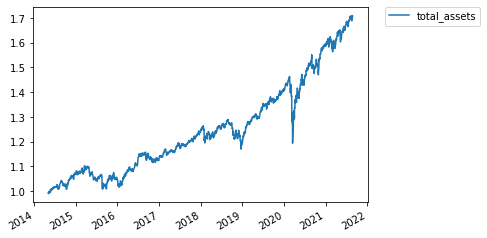

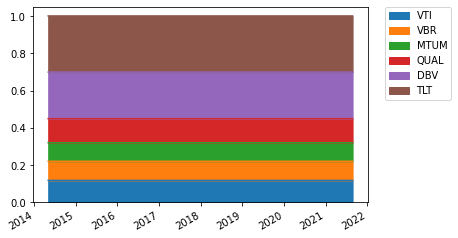

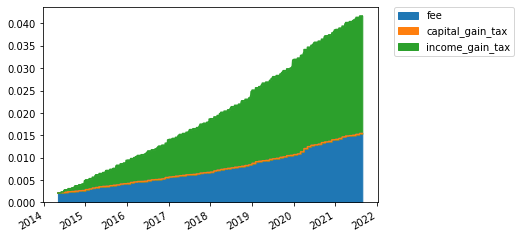

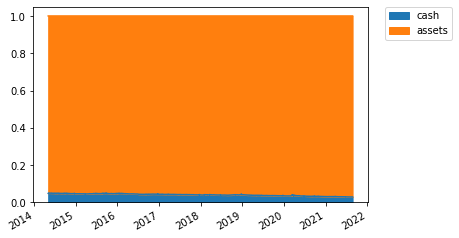

In [15]:
folds = split_k_folds(factor_market, 1, 200)
fold = folds[0]

optimizer = RiskParityOptimizer()
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=FixedEvacuator(level=0.05)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
display(report.summary())
display(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


US Market
------------------------

100%|██████████| 4021/4021 [00:49<00:00, 81.52it/s]


,tickers,yearly total return,sharpe ratio,max draw down,max draw down span
0,"[IEF, SPY, TLT, GLD]",1.049424,0.549103,0.921385,679


,return,std,sharpe ratio,draw down
2005-12-31,0.009973,0.043124,-0.232524,0.972777
2006-12-31,0.039166,0.043348,0.442148,0.968263
2007-12-31,0.105173,0.045344,1.878371,0.963520
2008-12-31,0.075799,0.076424,0.730122,0.930194
2009-12-31,-0.007858,0.077276,-0.360504,0.925369
2010-12-31,0.095268,0.061128,1.231330,0.942788
2011-12-31,0.132627,0.058660,1.919989,0.940709
2012-12-31,0.046253,0.042774,0.613765,0.970388
2013-12-31,-0.047459,0.057437,-1.174481,0.923509
2014-12-31,0.083588,0.041535,1.530971,0.935864


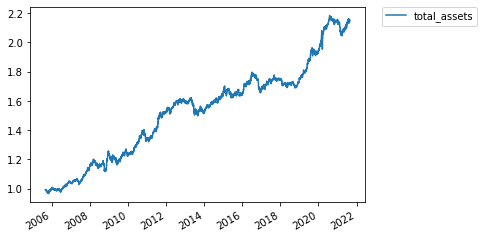

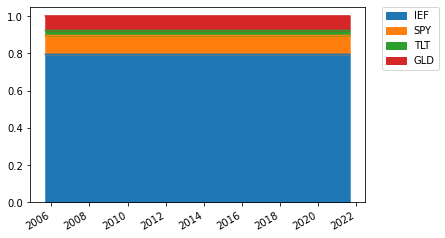

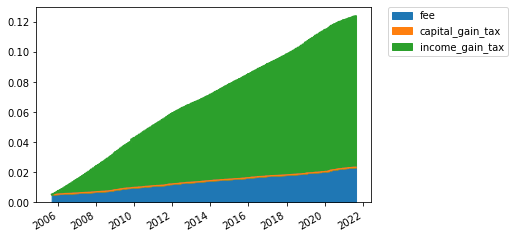

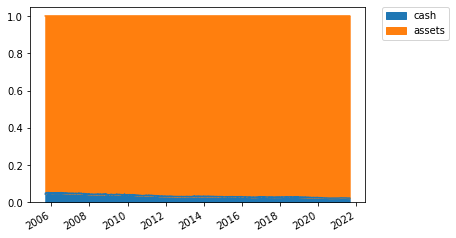

In [17]:
folds = split_k_folds(us_market, 1, 200)
fold = folds[0]

optimizer = RiskParityOptimizer(risk_target=[0.85, 0.05, 0.05, 0.05])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=FixedEvacuator(level=0.05)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
display(report.summary())
display(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

